*------------------------------------------------------------------------------------------------------------*

**Hands-On Machine Learning with Scikit-Learn & TensorFlow**

**Chapter-04 - Training Models**

**Date : 19-March-2020**

*------------------------------------------------------------------------------------------------------------*

**_Content :_**

* **Linear Regression : Least Square**
  * Closed Form : The Normal Equation
  * Gradient Descent (Batch and Staochastic)
* **Polynomial Regression**
* **Overfitting / Underfitting**
  * Learnig Curves
  * Bias Variance Tradeoff
* **Regularize Linear Models**
  * Ridge Regression
  * Lasso Reression
  * Elastic Net
  * lq norm Regression


# Ordinary Least Square Linear Regression

We can implement a linear regression model for performing ordinary least squares regression using one of the following approaches:

* Solving the model parameters analytically (closed-form equations)
* Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, Simplex Method, etc.)

## *Linear Regression : Closed Form*
## Linear regression (expressed in vectorized form):

    y_hat = hθ(x) = transpose(θ) . x
        where  θ = model's parameter vector
               x = instance's feature vector, x0 to xm, where x0=1 and m = numbe of features
              . = dot product
              hθ = hypothesis funtion, using the model parameter θ


    Cost function is MSE(X,hθ), MSE : Mean Square Error


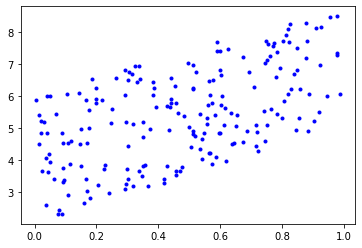

In [1]:

# Practice Code
## Lets generate some linear looking data to test this equation
import numpy as np
np.random.seed(10)
X =  np.random.rand(200,1)
y = 4 + 3 * X + np.random.uniform(low = -2, high = 2,size = (200,1)) # Add noise

import matplotlib.pyplot as plt
plt.plot(X,y, 'b.')

### The Normal Equation

To find the value of θ that minimizes the cost function, there is a closed form solution. This is called The Normal Equation

         θ_hat = inverse(transpose(X) . X) . transpose(X).y
            where  X = Training Ser (a matrix)
                   θ_hat = is the value of θ that minizes the cost function
                   y = the vector of target values


In [2]:
ones = np.ones((200,1)) # generates a matrix of size 100X1
X_b = np.c_[ ones, X]   # adding X0 to each instance

# Lets compute the θ_hat
theta_best = np.linalg.inv( X_b.T.dot(X_b) ).dot( X_b.T.dot(y))
print(theta_best)

[[4.01139807]
 [2.9186276 ]]


As you see the theta best is not the exact paremter we have used above, but close enough because noise made it impossible to recover the exact parameters of the original equation

In [3]:
# Now we can make the predictions using θ_hat
X_new = np.array([[0],[1]]) # two instance with x1=0 and x1=1
X_new_b = np.c_[np.ones([2,1]), X_new] # Creating the training set by adding x0=1
y_predict = X_new_b.dot(theta_best)
print(y_predict)

[[4.01139807]
 [6.93002567]]


In [4]:
# What are y_actual if we use the actual parameters which have generated the dataset (noise added)
theta_actual = np.array([4,3])
y_actual = X_new_b.dot(theta_actual)
print(y_actual)

[4. 7.]


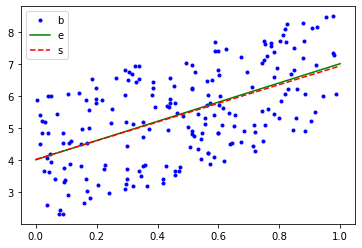

In [5]:
plt.plot(X,y,"b.", label = 'Actual Data')
plt.plot(X_new,y_actual,"g-",  label = 'Actual Function')
plt.plot(X_new,y_predict,"--",color=[1,0,0],  label = 'Predicted Function, Linear Regression')
plt.legend('best')
plt.show()

The equivalent code using Scikit-Learn's LinearRegression function looks like this


In [28]:

from sklearn.linear_model import LinearRegression
lm_reg = LinearRegression()
lm_reg.fit(X,y)
print(lm_reg.intercept_, lm_reg.coef_) # Same as we have done manually


[4.01139807] [[2.9186276]]


#### Computational complexity of The Normal Equation
1. Computation complexity of inverting X_T.X matrix (nXn, where n is number of features)is O(n^2.4) to O(n^3) depends on implementation
2. This euqtion is linear O(m) with number of instance (m)
3. Predictions are very fast.

# *Linear Regression : Gradient Descent*
* A different way to train a linear regression model
* better suited for cases where there are a large number of features.
* Or too many training instances to fit into memory.

## Gradient Descent
Its a generic optimization algorithm capable of finding optimal solutions to wide range of problems. The general idea is to tweak parameters iteratively in order to minimize a cost function.

Concretely, you start by filling θ with random values, then you improve it gradually by taking baby step at a time attempting to decrease the cost function until the algorithm converges to a minimum.
* Size of the steps determine by the **learning rate** parameter.
* If the learning rate is too small, then algoritmh will take lot of iterations/time to converge.
* If its too high, you might jump across the valley and end up on the other side, possibly even higher up.

To determine a good learning rate, you can use grid search

**Image 1 : MSE for a single feature**
<img src="Images/Ch 4 Linear Regression GD/GradientDescent.png" alt="Gradient Descent MSE" style="width: 400px;"/>

Not all cost functions look like nice, regular bowls i.e. it wont be a convex function many times and algorithm could end up in local minimum. Or may take a lot of time to cross a plateu (saddle point).

**Image 2 : A general non-convex cost function**
<img src="Images/Ch 4 Linear Regression GD/GradientDecentCostFunc2.png" alt="Gradient Descent General" style="width: 500px;"/>

But in case of MSE for Linear regression *(Image 1)* cost function, following two facts gauranteed that the Gradient Descent will aproach global minimum.
* Its a convex function. (For a convex function if you pick any two points on the curve the line segment joining them never crosses the curve.)
* It is also a continuous function with a slope that never changes abruptly

Links : Statsquest, Gradient Descent Explained
https://www.youtube.com/watch?v=sDv4f4s2SB8

**Scaling**: Scaling of variable does matter, becuase convex function may look weirdly elongated if the feature scale is very different, then it may take longer time to reach minimum
*So good practice is to ensure that all features have a similar scale*

Feature Scaling link: https://www.youtube.com/watch?v=e1nTgoDI_m8

**Image Feature Scaling**
<img src="Images/Ch 4 Linear Regression GD/FeatureScaling GD.png" alt="Gradient Descent General" style="width: 500px;"/>


### Batch Gradient Descent
This algorithm involves calculations over the full (whole batch) training set at each greadient descent step.
* Its terrible slow if a large data-set.
* But scales very well with the number of features. And much faster than normal equation and SVD decomposition if hundreads of thousands of features.

**Partial Derivetive** : At every iteration, you need to compute the gradient of the cost function with regard to each parameter 0j. It means how much the cost function will change if you change 0j just a little bit.

gradient MSE (full vector) = 2/m * transpose(X)(X.theta- y)  

**As you see, in above gradient calcultaion, in simple english, its nothing, but, error (given a single ith feature and its parameter theta_i) for the every instance are multipled with that instance's value for the ith feature) itself and then reduced from the theta at every gradient descent step.**

**Image 3 : Partial Derivatives of the cost function**
<img src="Images/Ch 4 Linear Regression GD/batch gd partial derivatives_1.jpg" alt="Partial deri" style="width: 500px;"/>

Instead of computing these partial derivatives individually, you can use following equation, The gradient vector,

**Image 4 : The Gradient vector of the cost function**
<img src="Images/Ch 4 Linear Regression GD/batch gd gradient_1.jpg" alt="gr" style="width: 500px;"/>





[[ 3.78310929]
 [-3.64699611]]
[[4.23374752]
 [2.47633117]]


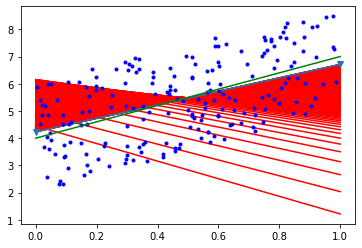

In [6]:
eta = .1 # Learning rate, 0.04 is just enough learning rate.
# with learning rate =1, the final parameters are far away the actual
# With learnign rate =0.01, its taking a lot of iterations to converge.
n_iterations = 200
m  = 200  # Number of instances in training data set

theta  = 5*np.random.randn(2,1) #random inititalization 
#randn generates random number from normal distribution while rand generates from uniform distribution [0,1)

print(theta)


for iteration in range(n_iterations):
    #print(X_b.T.dot(X_b.dot(theta)))
    gradients = 2/m * (X_b.T.dot(X_b.dot(theta) - y))
    theta = theta - eta * gradients
    y_predict = X_new_b.dot(theta)
    plt.plot(X_new,y_predict,"r-",  label = 'Predicted Functio')
    #print(theta)

print(theta)
#y_predict = X_new_b.dot(theta)
plt.plot(X_new,y_predict,"v-",  label = 'Predicted Functio')    
plt.plot(X,y,"b.", label = 'Actual Data')
plt.plot(X_new,y_actual,"g-",  label = 'Actual Function')
plt.show()

How to set the number of iterations?
* If it is too low, you will still be far away from the optimal solution when the algo stops.
* If high, you will waste time if while the parameters do not change anymore.
A simple solution is to set a very large number of iterations, but to interrupt the algorithm when the gradient vector (norm) becomes tiny, smaller than a tiny number called **tolerance** (epsilon).

*convergance rate*


### Stochastic Gradient Descent
This algorithm takes a random instance in the training set at each step and computes the gradients based on that single instance. (an Online learning, on the fly learning)
Beacause of its stochastic (Random) nature, this algorithm is much less regular than Batch GD. Instead of gently decreasing the cost function will bounce up and down until it reaches minimum and even at minimum it continue to bounce around and never settle down. So final parameters values are good but never optimal.

Pros
* For larger datasets faster than batch GD generally. It is computationally fast as only one sample is processed at a time.
* Possible to train on a huge data set which can not fit into the memory.
* When the cost function is very irregular, this can actually help the algorithm to jump out of local minimum.

Cons:
* Due to noisy steps, it may take longer to achieve convergence to the minima of the loss function
* It loses the advantage of vectorized operations as it deals with only a single example at a time
* Frequent updates are computationally expensive due to using all resources for processing one training sample at a time
* It loses the advantage of vectorized operations as it deals with only a single example at a time

**Why Stochastic can reach minimum in small time?**
The key concept is we don’t need to check all the training examples to get an idea about the direction of decreasing slope. By analyzing only one example at a time and following its slope we can reach a point that is very close to the actual minimum. Here’s an intuition…

For an example,
Suppose you have made an app and want to improve it by taking feedback from 100 customers. You can do it in two ways. In the first way, you can give the app to the first customer and take his feedback then to the second one, then third and so on. After collecting feedbacks from all of them you can improve your app. But in the second way, you can improve the app as soon as you get the feedback from the first customer. Then you give it to the second one and you improve again before giving it to the third one. Notice that in this way you are improving your app at a much faster rate and can reach a optimal point much earlier.

**Simultaneous Annealing**
The randomness is good to escape from local minima, but bad because the algo can never settle at minima, it keeps bouncing around optimal solution. Solution to this dilemma is to gradually reduce the learning rate. The function that determines the learning rate at each iteration is called the *learning schedule*.

Since instances are picked randomly, some instances may be picked several times per epoch while others may not picked at all. If you want to be sure that every instance be used at each epoch, another approach is to shuffle the training set, then go through it instance by instance. Howeever this generally converges more slowly.


**SGD using Scikit**
To perform linear regression, one can use SGDRegression from scikit learn.


[[12.1478265 ]
 [10.08282967]]
[[3.94133287]
 [3.01339593]]


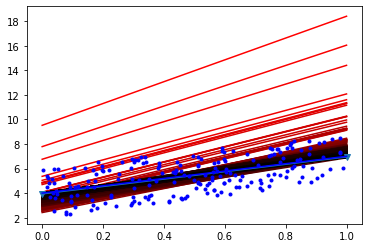

In [7]:
n_epochs = 50
t0, t1 = 5, 50    # Learning schedule hyperparameters.
number_of_instances = y.shape[0]
def learning_schedule(t):
    return t0 / (t + t1)

theta = 10* np.random.randn(2,1)
print(theta)
for epoch in range(n_epochs):             # rounds or epochs
    for i in range(number_of_instances):  # iterations
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1] # ':' returns a matrix, not a vector
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi) # m is going to go in learing schedule function and hence removing it from here
        eta = learning_schedule( epoch * m + i)
        theta = theta - eta * gradients
        
        y_predict = X_new_b.dot(theta)
        plt.plot(X_new,y_predict,"-", color=[eta*10,0,0], label = 'Predicted Functio')
    #print(theta)

print(theta)
y_predict = X_new_b.dot(theta)
plt.plot(X_new,y_predict,"v-",  label = 'Predicted Functio')    
plt.plot(X,y,"b.", label = 'Actual Data')
plt.plot(X_new,y_actual,"-", color=[0,0,1],  label = 'Actual Function')
plt.show()



### Mini-batch Gradient Descent
It uses small random sets of instances called mini-batches.
Pros
* you can get a performance boost over SGD from hardware optimization of matrix operations, especially when using GPUs.
* Progresses less erratic at every step than SGD.

### Comparison for the algorithm for Linear regression:


<img src="Images/Ch 4 Linear Regression GD/comparison linear algo_1.jpg" alt="Partial deri" style="width: 800px;"/>


# Polynomial Regression
what if our data is more complex than a striaght line?


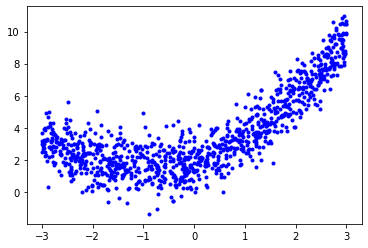

In [34]:
import numpy as np
import matplotlib.pyplot as plt

m = 500
X = 6* np.random.rand(m,1) - 3
y = 0.5 * X**2  + X + 2 +  np.random.randn(m,1) #np.random.uniform(low = -1, high = 1,size = (m,1))
#plt.plot(X,y, 'b.')


m = 1000
X_test = 6* np.random.rand(m,1) - 3
y_test = 0.5 * X_test**2  + X_test + 2 +  np.random.randn(m,1) #np.random.uniform(low = -1, high = 1,size = (m,1))
plt.plot(X_test,y_test, 'b.')
plt.show()


Clearly, a straight line will never fit this data properly. So lets use the scikit learn's polynomialFeatures class to transform our training data.

**Function : PolynomialFeatures** : generates all combination of features up to the given degree. For example, if there were two features a and b, polynomialFeatures with degree=3 would not only add the features a^2,a^3,b^2,b^3, but also the combinations ab, a^2b and ab^2.

If higher number of features and high deree, beware of the combinatorial explosion of the number of features.

In [35]:
# How centering features and response effect intercept
# Intercept goes small if only response is centered and goes to zero if both are centered.

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

####################### Fit a Quadratic function ###################################
poly_features = PolynomialFeatures(degree=2, include_bias = False)
scaler = StandardScaler()
X_poly = poly_features.fit_transform(X)
X_poly = scaler.fit_transform(X_poly)
y = scaler.fit_transform(y)
print(X[0])
print(len(X_poly[0]))
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_, lin_reg.coef_)
# Testing on the data
X_test_poly = poly_features.transform(X_test)
y_test_pred = lin_reg.predict(X_test_poly)

[2.53799662]
2
[7.18210141e-16] [[0.71452806 0.57345543]]


[-1.12798244]
2
[2.04659189] [[1.01085406 0.50698221]]


(0.0, 10.0)

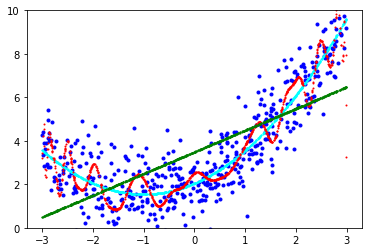

In [383]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

####################### Fit a Quadratic function ###################################
poly_features = PolynomialFeatures(degree=2, include_bias = False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(len(X_poly[0]))
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_, lin_reg.coef_)
# Testing on the data
X_test_poly = poly_features.transform(X_test)
y_test_pred = lin_reg.predict(X_test_poly)

####################### Fit a higher degree function ###################################

# Use pipeline to apply function simultaneously on the same object
from sklearn.pipeline import Pipeline

#******* Just try it with and without scaling you will find a lot different results
model  = Pipeline([
    ("poly_features", PolynomialFeatures( degree=50, include_bias = False)),
    ("scaler",StandardScaler()),
    ("lin_reg", LinearRegression()),
])

model.fit(X, y)
y_test_pred2 = model.predict(X_test)

#Underfitting with linear model
lin_reg = LinearRegression()
lin_reg.fit(X, y)

y_test_pred3 = lin_reg.predict(X_test)

  
plt.plot(X,y, 'b.')                                 # Training Data                     : 
plt.plot(X_test,y_test_pred, 'g.',color=[0,1,1], markersize= 2)     # quadratic function, on test data  : Generalizes well
plt.plot(X_test,y_test_pred2, 'r.', markersize= 2)    # polynomial degree=30, --          : Overfit, high variance
plt.plot(X_test,y_test_pred3, 'g.', markersize= 2) # Linear model, --      : Underfit, high bias
plt.ylim([0,10])

## Overfitting / Underfitting
As we see above, The high degree (=30) polynomial Regression model is severely ovrfiting the trainging data, while the linear model is underfitting it. 
Quandratic model above is genrealizing well and it make sense becuase we have used it to generate the data itself.

* But in reality we dont know what is the true function that has genereted the data (population), so how one decide how complex the model should be?
* How can you tell if that your model is overfitting or underfitting?

Solutions are:
* The Learning Curves
* The bias variance tradeoff

### The Learning Curves :
These are the plots of model's performance (Y-axis) on train and validationn set as a function of the training set (training iterations/ size) (X-axis) 
To generate the plot train the model  several times on different training set.


In [391]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X,y):
    X_train, X_vali, y_train, y_vali = train_test_split(X,y,test_size=0.1)
    train_errors, vali_errors =[],[]
    for m in range(1,len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_vali_predict = model.predict(X_vali)
        train_errors.append( mean_squared_error(y_train[:m], y_train_predict))
        vali_errors.append( mean_squared_error(y_vali, y_vali_predict))
    plt.plot(np.sqrt(train_errors), "r-", linewidth=2, label='train')
    plt.plot(np.sqrt(vali_errors), "b-", linewidth=2, label='validation')
    plt.legend(loc = "upper right")
    plt.ylim(0,5)
    

**Learning Curve : When we UNDERFIT, curves reaches a plateu and both are close and fairly high**
As we see, 
* when the size of training data set is low ie <100, train RMSE is low while test RMSE is high.
* But as the training size grows, it looks impossible for the model to fit the data perfectly and hence train and test RMSE reaches a plateu and cant improve further as we grow the training data set.


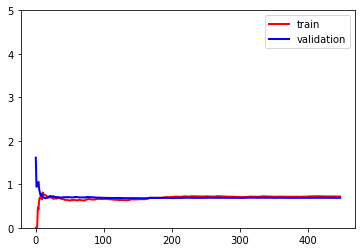

In [409]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg,StandardScaler().fit_transform(X),StandardScaler().fit_transform(y))

**Learning Curve : When we Overfit**
As we see, below learning curves look a bit like the previous ones, but there are two important differences
* error on training data set is lower compared to previous one
* There is a gap between the curves, which means that the model performs significantly better on the training data than the overall

None


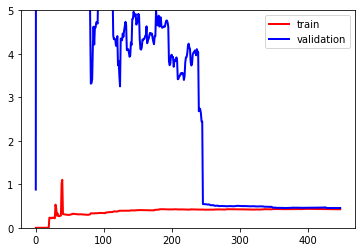

In [410]:
from sklearn.pipeline import Pipeline
poly_regression = Pipeline([
    ("poly_features", PolynomialFeatures( degree=30, include_bias = False)),
    ("lin_reg", LinearRegression()),
])
print(plot_learning_curves(poly_regression,StandardScaler().fit_transform(X),StandardScaler().fit_transform(y)))

**Learning Curve : When we fit well**
As we see, below learning curves look a bit like the previous ones, but there are two important differences
* error on for both train and test set is lower compared to underfit one. which say there is some error called bias which our function is not able to predict.
* errot on test is lower even if train is higher compared to overfit, which says we are generalizing well.
* lesser gap between the curves.

None


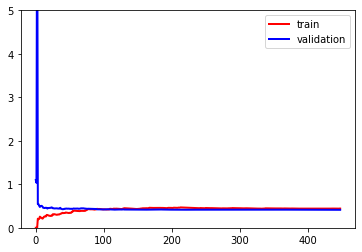

In [411]:
from sklearn.pipeline import Pipeline
poly_regression = Pipeline([
    ("poly_features", PolynomialFeatures( degree=2, include_bias = False)),
    ("lin_reg", LinearRegression()),
])
print(plot_learning_curves(poly_regression,StandardScaler().fit_transform(X),StandardScaler().fit_transform(y)))


In [426]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
def plot_bias_variance_tradeoff(X,y, complexity_range):
    train_errors, vali_errors = [],[]
    scoring =  make_scorer(mean_squared_error)
    for m in complexity_range:
        poly_regression = Pipeline([
            ("poly_features", PolynomialFeatures( degree=m, include_bias = False)),
            ("lin_reg", LinearRegression())])
        cv_results = cross_validate(poly_regression, X, y, cv=5, 
                scoring=scoring,return_train_score= True)
        #print(cv_results)
        train_errors.append( np.sqrt(cv_results['train_score'].mean()))
        vali_errors.append( np.sqrt(cv_results['test_score'].mean()))
    plt.plot(complexity_range,train_errors, "r-", linewidth=2, label='train')
    plt.plot(complexity_range,vali_errors, "b-", linewidth=2, label='validation')
    plt.legend(loc = "upper right")
    plt.ylim(0,5)
    #return(train_errors, vali_errors)

### The bias variance tradeoff
**Bias**: The error introduced by apporximating a complex problem by a simpler model (due to underfitting). like quadratic function is the true function for above problem and assuming a linear model wont be able to explain the variance and lead to error called bias.

**Variance**: This error is introduced due to overfitting. It refers to the amount by which estimated function would change if we are using a different training dataset. More flexible models have higher variance.

As we see in the below graph.
* For Linear Regression model, degree=1, we have higher test and train RMSE.
* When using quadratic function, degree=2, we have least train and test RMSE.
* until degree 30, train error goes down while test error goes up. and the both the error starts increasing.
So quadratic function seems fitting the data best.


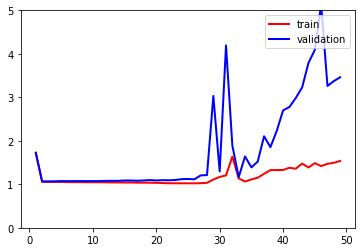

In [427]:
plot_bias_variance_tradeoff(X,y,range(1,50))

## Regularized Linear Models (Shrinkage Methods)

Complexity in a machine learning model specially linear model:
* Number of polynomial degree
* Number of predictors

Least Square linear model are the unconstrained optimization method. When number of predictors (p) are high or p>n (n= number of training instances) than the trained model can overfit and may have high variance (highly sensitive to different train set). Similar situation can arise in case of higher polynomial degree.

Regualrized methods constraints(shrinks) the coefficients of the linear model, make the model less flexible and reduce the significant variance on the cost of small bias, so that the models do not overfit.


There are two ways we can regularize a cost function:
* **Constrained Regularization** : By Constraining the cost function
* **Penalized Regularization** : By adding a penalty term in the cost function

<img src="Images/Ch 4 Linear Regression GD/Constarained Regularization.png" alt="Partial deri" style="width: 600px;"/>
<img src="Images/Ch 4 Linear Regression GD/Pernalized Regularization.png" alt="Partial deri" style="width: 600px;"/>
<img src="Images/Ch 4 Linear Regression GD/Constrained VS Unconstrined.png" alt="Partial deri" style="width: 600px;"/>




#### Famous Regularization Methods
* **l2 Norm, Ridge Regression** : 
* **l1 Norm, Lasso Regression** :  
* **Elastic Net , combination of both l2 and l1**:
* **Early Stopping** : 


Pros :
* Avoids overfitting by making a model less flexible and hence reduce variance on the cost of negligible bias.
* Alternative to Subset feature selection if some of the coefficients are reduced to exact zero (Lasso)



### Ridge Regression:
A regularied version of linear model (least square) except the coefficients are estiamted by minimizing a slightly different quantity which is MSE(theta) + lambda * ||theta||2.

**regualrization term / shrinkage panalty / l2 norm:** ||theta||2 is the l2 norm of the coeffiecients. This forces the learning algortihm to not only fit the data but also keep the model weights as small as possible.

**The hyperparameter lambda:** controls the regularization, 0 means its just a linear regression. If its large, then all weights are very close to zero and the result will be a flat line going though the data's mean.


**We always use the penalized form of Ridge regression, though both penalized and constrained form are equivalent**
<img src="Images/Ch 4 Linear Regression GD/Ridge Regression Bloom.png" alt="Partial deri" style="width: 600px;"/>
<img src="Images/Ch 4 Linear Regression GD/Ridge Regression.png" alt="Partial deri" style="width: 400px;"/>
 nce the model is trained, you want to use the unregularized performace measure to evaluate the model's perforamnce.

**The l2 norm doesnt include the intercept, because we does not make sense to shrink it. So we tweak the closed form or GD algorithm to never shrink it OR we can eliminate intercept itself by centering the data (features and response both)**

**Scaling** : Scaling/Standardization of features is necessary for Regularized Regression.
becuase if you dont scale the features, XjThethaj for Regularized regression depends on tuning parameter alpha as well as scaling of the features. And if we dont do the scale it can lead to very different and misleading coefficients



**Normalization vs Standardization**
* Normalization: is transforming the feature on the scale of 0 to 1.
* Standardization: around mean =0 and sd=1. converting to z score




### Lasso Regression: The absolute Shrinkage and Selection Operator Regression
An important characterstic of Lasso is that it tends to eliminate the weights of the least important features. *Its not always a case that coeff/weights will reduce to exact zero.** I will explain this in more later in notes.

**regualrization term / shrinkage panalty / l1 norm**: ||theta||1 is the l2 norm of the coeffiecients.


<img src="Images/Ch 4 Linear Regression GD/Lasso Boom Equartion.png" alt="Partial deri" style="width: 600px;"/>
<img src="Images/Ch 4 Linear Regression GD/Lasso Regression.png" alt="Partial deri" style="width: 400px;"/>




Weights Before Regularization: [[ 2.48885185e+00 -3.61355979e+01 -1.42956663e+02  2.96477569e+03
   5.17688343e+03 -1.27487324e+05 -4.31055132e+04  3.15626218e+06
  -1.40639579e+06 -4.92306427e+07  4.69044562e+07  5.19900870e+08
  -7.07723666e+08 -3.89306143e+09  6.84332218e+09  2.12552062e+10
  -4.66650636e+10 -8.58402956e+10  2.33707677e+11  2.56798952e+11
  -8.75326126e+11 -5.59895759e+11  2.46043118e+12  8.44576548e+11
  -5.12681092e+12 -7.43111385e+11  7.60264751e+12  4.13246788e+10
  -7.08122420e+12  7.61732875e+11  1.88325202e+12 -6.95627290e+11
   4.97766161e+12 -3.91666504e+11 -7.16595123e+12  1.25039549e+12
   2.12111890e+12 -7.13873227e+11  5.23038562e+12 -6.87290434e+11
  -8.31532345e+12  1.49846171e+12  6.22068218e+12 -1.23157932e+12
  -2.72697919e+12  5.65660389e+11  6.76038770e+11 -1.43806966e+11
  -7.38263342e+10  1.59046981e+10]]
Weights After l2 Regularization: [[ 1.50154426e+00  1.10510473e+00  3.45224998e-01  2.68651785e-01
  -3.37355453e-02  1.29666936e-02 -8.37245

(0.0, 10.0)

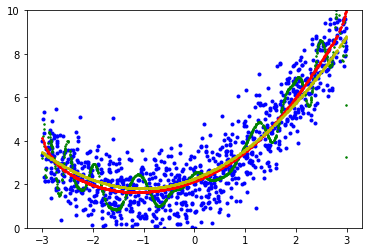

In [462]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
# Closed form of Ridge Regression
from sklearn.linear_model import Ridge 
# Stochastic greadient descent, with parameter penalty='l2' is equivalent to Ridge
from sklearn.linear_model import SGDRegressor
# Use pipeline to apply function simultaneously on the same object
from sklearn.pipeline import Pipeline


####################### Fit a higher degree function ###################################
#******* Just try it with and without scaling you will find a lot different results

# No Regularization
linear_model  = Pipeline([
    ("poly_features", PolynomialFeatures( degree=50, include_bias = False)),
    ("scaler",StandardScaler()),
    ("lin_reg", LinearRegression()),
])
linear_model.fit(X, y)
y_test_pred = linear_model.predict(X_test)

# l2, Ridge
ridge_model  = Pipeline([
    ("poly_features", PolynomialFeatures( degree=30, include_bias = False)),
    ("scaler",StandardScaler()),
    ("ridge_reg", Ridge(alpha=10, solver='cholesky')),
])

ridge_model.fit(X, y)
y_test_pred2 = ridge_model.predict(X_test)

#l1, Lasso
lasso_model  = Pipeline([
    ("poly_features", PolynomialFeatures( degree=30, include_bias = False)),
    ("scaler",StandardScaler()),
    ("lasso_reg", Lasso(alpha=.2)),
])
lasso_model.fit(X, y)
y_test_pred3 = lasso_model.predict(X_test)

print("Weights Before Regularization:",linear_model['lin_reg'].coef_)
print("Weights After l2 Regularization:", ridge_model['ridge_reg'].coef_)
print("Weights After l1 Regularization:", lasso_model['lasso_reg'].coef_)

print("Error Rate Before Regularization:",np.sqrt(mean_squared_error(y_test,y_test_pred)))
print("Error Rate After Regularization:", np.sqrt(mean_squared_error(y_test,y_test_pred2)))
print("Error Rate After Regularization:", np.sqrt(mean_squared_error(y_test,y_test_pred3)))

plt.plot(X_test,y_test, 'b.')                                 # Training Data                     : 
plt.plot(X_test,y_test_pred, 'g.', markersize= 3)     
plt.plot(X_test,y_test_pred2, 'r.', markersize= 3)    
plt.plot(X_test,y_test_pred3, 'y.', markersize= 3)  
plt.ylim([0,10])

#### Comparison Ridge vs Lasso:
* **Interpretebility**: Lasso solutios are more interpretable becuase it eliminates features with low effects and hence les number of relations to analyse. Performs a subset selection. While Ridge never eliminate any variable.

* **Computational time and Reaching to the optimum solution**: Gradient Descent bounce around the optimum at the end when using Lasso, which leads to increase time in getting to optimum solution or may never reach like SGD, solution is decrease learning rate as going towards global optimum. While incase of Ridge it will be a smooth path toward the global optimum.

* **Performance**: Neither Ridge or Lasso is univerally dominate the other. In general, one might except the lasso to perform better in a setting where a relatively small number of predcitors have a substantial coefficients, and the remaining have coefficient very small or negligible. While, Ridge will perform better when response is a function of many predictors of coefficient rougly of equal size. however, the relatioship is never known a priori for real datasets. cross validation helps in finding the right reglarization and tuning parameter. 
* **In terms of stability** : Lasso is more unstable/erratic when p > n or when several features are correlated.
        * For identical features x1=x2
         ** Lasso : spread weights arbitarily
         ** Ridge : equally
        * For linearly related weights (correlated)
         ** Lasso : choose variables with larger weights
         ** Ridge : spread weights proprtion to the scale of features.
         
         **Explaining above in the last on why is lasso unstable**

* **Regularization Path**
As you can see, weights in case of *Ridge Regression* are shrinking in more smooth path and reaches only to 0 when we keep the tuning parameter as high as possible. 

  While in *Lasso*, the path is more ziag-zag and first reaches to exact 0 and then follow the axis.

  Y axis are value of weights/coefficients, while X- axis is ratio of l'i' norm of regularized weights to l'i' norm   of unregularized weights. so aws we go to left from right we are constraining weights more and more.

<img src="Images/Ch 4 Linear Regression GD/Ridge vs Lasso : Path.png" alt="Partial deri" style="width: 600px;"/>


    *Weights path when we strat constraining the cost function more and more*
<img src="Images/Ch 4 Linear Regression GD/ridge lasso wts.jpg" alt="Partial deri" style="width: 600px;"/>

* **Lasso estimated weights are often sparse**
  If the unconstrained global minimum of MSE cost function is in the white region, then only a contour of cost       function touches in the white reason and then it generates a non-zero weights, otherwise it will generate an       exact zero weight. As you see the white reason is small with compare to the colored reason, that's why its more     likely that Lasso generates more zero weights.

  While in case of Ridge, it generates exact zero only when the cost function touches the penalty function on any     of the axis, which has very negligible probablity, that's why Ridge estimates near to zero but couldnt reduce it   to zero.

<img src="Images/Ch 4 Linear Regression GD/Lasso Sparse.png" alt="Partial deri" style="width: 600px;"/>




### Elastic Net
Its a middle ground between Ridge and Lasso. The shrinkage penalty is a simple mix of both l1 and l2 norm.

With lambda1  = 0 its Ridge, and with lambda2=0 its Lasso. 
<img src="Images/Ch 4 Linear Regression GD/Elastic Net Equation.png" alt="Partial deri" style="width: 600px;"/>
<img src="Images/Ch 4 Linear Regression GD/Elastic net.png" alt="Partial deri" style="width: 600px;"/>



### When to use Linear Regression(No regularization), Ridge, Lasso, Elastic Net?:
* Always preferreble to have at least a little regularization, so generally one should avoid plain Linear Regression.
* Ridge is good default, but if you suspect that only a few features are useful than use Lasso or ElasticNet.
* Elastic Net is preferred over Lasso, as lasso could get unstable and erratic for p>n and correlated features.


### Do you want more sparser weights then Lasso?

Choose norm "<1" 
<img src="Images/Ch 4 Linear Regression GD/differnt penalty functions.png" alt="Partial deri" style="width: 600px;"/>
<img src="Images/Ch 4 Linear Regression GD/sparser weights.png" alt="Partial deri" style="width: 600px;"/>




### Why Lasso is unstable in case of correlated features

#### Duplicate features
Lets consider two duplicate feature x1 = x2
<img src="Images/Ch 4 Linear Regression GD/Duplicate Features.png" alt="Partial deri" style="width: 600px;"/>

Then the all the functions with total weight of 4 are the optimal function. 
Notes : Thats why multicollinearity is bad to find an optimal solution becuase we dont have a single solution instead we have a set of solution which are close to optimal, hence a high variance and difficult to interpret. so its always good to remove multicolllinearity. 
<img src="Images/Ch 4 Linear Regression GD/Duplicate Features2.png" alt="Partial deri" style="width: 600px;"/>

As you see, for different (+ve) weights for x1 and x2 Lasso is minimizing, hence a set of soultion. while in case of Ridge it minimzing only for equalt sets.
<img src="Images/Ch 4 Linear Regression GD/Duplicate Features3.png" alt="Partial deri" style="width: 600px;"/>
<img src="Images/Ch 4 Linear Regression GD/Duplicate Features 4.png" alt="Partial deri" style="width: 600px;"/>
<img src="Images/Ch 4 Linear Regression GD/Duplicate Features 5.png" alt="Partial deri" style="width: 600px;"/>

#### Linearly Related Features
Suppose x2 = 2 * x1. x2 has larger scale hence weight would be half of the x1 for uncosntrained Gradient Descent.
<img src="Images/Ch 4 Linear Regression GD/Duplicate Features 6.png" alt="Partial deri" style="width: 600px;"/>

Ridge has spread weights proprtionally
<img src="Images/Ch 4 Linear Regression GD/Duplicate Features 7.png" alt="Partial deri" style="width: 600px;"/>

Lasso eliminate the feature will smaller scale completely
<img src="Images/Ch 4 Linear Regression GD/Duplicate Features 8.png" alt="Partial deri" style="width: 600px;"/>

#### Linearly correlated Features:
Lasso is highly unstable because a slight change in scale of one feature and if it gets bigger than other, it will choose the other feature.
<img src="Images/Ch 4 Linear Regression GD/Duplicate Features 9.png" alt="Partial deri" style="width: 600px;"/>

Elastic net is more stable
<img src="Images/Ch 4 Linear Regression GD/Duplicate Features 10.png" alt="Partial deri" style="width: 600px;"/>


### Early Stopping
A very different way to regularize iterative learning such as GD is to stop training as soon as the validation error reaches minimum.

<img src="Images/Ch 4 Linear Regression GD/early stopping.jpg" alt="Partial deri" style="width: 600px;"/>
